## A Linear Regression example with numpy

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

### Generate dummy data

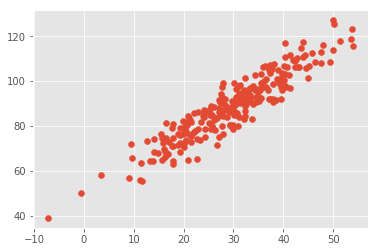

In [242]:
theta_real_0 = 50
theta_real_1 = 1.3

xs = np.random.normal(30.0, 10.0,250)
ys = theta_real_0 + theta_real_1 * xs + np.random.normal(0, 5.0,250)

plt.scatter(xs,ys)

That is the spread that we will try to aproximate with our line.

### Write the cost function

In [243]:
theta_0 = theta_real_0
theta_1 = theta_real_1

m = len(xs)

cost_function = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
cost_function

27.80687086544504

### Gradient descent

Remember, we have to descend in the direction of the steepest gradient. For that, we need to now what direction the gradient points!

### Partial differentials of the cost function

$$\frac{\partial}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

In [248]:
G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
G_theta_0

-0.5646831776260615

In [249]:
G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
G_theta_1

-24.017966362149913

### Implementing gradient descent

Now we are ready to implement the actual gradient descent. Remember, the algorithm is:

- Initialize variables

- Compute cost function

- Compute gradients

- Update variables: gradient times learning rate (alpha)

- Repeat until convergence: cost at iteration n-1 $\sim$ cost at iteration n

theta_0 =  49.21339812304554
theta_1 =  1.3361371826131994
cost_function =  27.59511492643659
i =  49928
diff = 9.99662574940885e-11


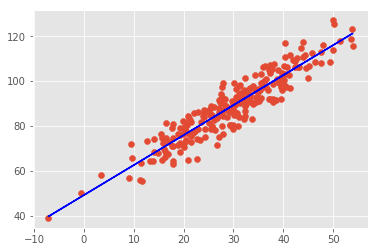

In [408]:
#OPTION 1 - SIMPLEST ONE

i = 0
alpha = 0.001
theta_0 = 1
theta_1 = 1
diff = 1

cost_function_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()

while diff > 0.0000000001 and i < 100000:
    
    theta_0 = theta_0 - alpha * G_theta_0
    theta_1 = theta_1 - alpha * G_theta_1
    
    cost_function_2 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    diff = abs(cost_function_1 - cost_function_2)
    
    #print(theta_0, theta_1, G_theta_0, G_theta_1, cost_function_2, diff)
    
    G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
    G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
    cost_function_1 = cost_function_2
    i += 1

print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('cost_function = ', cost_function_2)
print('i = ', i)
print('diff =', diff)

ys_pred = theta_0 + theta_1 * xs

plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

theta_0 =  49.213398133234676
theta_1 =  1.3361371823044348
cost_function =  27.595114926433364
i =  50024
diff = 9.99733629214461e-11


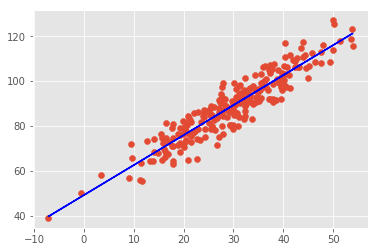

In [364]:
#OPTION 2 - ORIGINAL (MORE CALCS)
i = 0
alpha = 0.001
theta_0 = 0
theta_1 = 0
diff = 1

G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()

while diff > 0.0000000001 and i < 100000:
    
    cost_function_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    theta_0 = theta_0 - alpha * G_theta_0
    theta_1 = theta_1 - alpha * G_theta_1
    
    cost_function_2 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
    G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
    
    diff = abs(cost_function_1 - cost_function_2)
    i += 1

print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('cost_function = ', cost_function_2)
print('i = ', i)
print('diff =', diff)

ys_pred = theta_0 + theta_1 * xs

plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

In order to check the answer above, $\theta_0$ and $\theta_1$ are calculated considering the exact formula that minimize the cost function:

$$\theta_1 = \frac{\sum_{i=1}^m({x}_i-\bar{x}).({y}_i-\bar{y})}{\sum_{i=1}^m({x}_i-\bar{x})^2} $$

$$\theta_0 = \bar{y} - \theta_1.\bar{x} $$

In [315]:
xs_mean = xs.mean()
xs_mean

29.57578287133928

In [316]:
ys_mean = ys.mean()
ys_mean

88.7308593215541

In [317]:
theta_1_function = ((xs-xs_mean)*(ys-ys_mean)).sum() / ((xs-xs_mean)**2).sum()
theta_1_function

1.3360910369289962

In [318]:
theta_0_function = ys_mean - theta_1_function * xs_mean
theta_0_function

49.21492091699957

In [319]:
theta_0_error = abs(theta_0 - theta_0_function)/theta_0_function *100
theta_0_error

0.0030941505879059474

In [320]:
theta_1_error = abs(theta_1 - theta_1_function)/theta_1_function *100
theta_1_error

0.003453759823479667

## CALCULATION BY NUMERICAL APPROACH

theta_0 =  49.168062906610196
theta_1 =  1.3368424187869647
cost_function =  27.59577881413469
i =  54889
diff = 9.99786919919643e-10


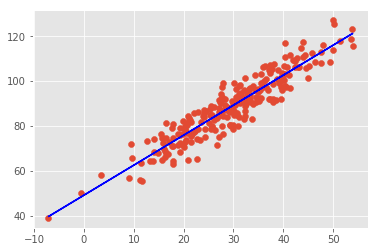

In [412]:
# CALCULATION CONSIDERING NUMERICAL APPROACH FOR CALCULATING GRADIENTS
i = 0
alpha = 0.001
beta = 1.001
theta_0 = 1
theta_1 = 1
diff = 1

cost_function_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
cost_function_1_GN_0 = (1/m) * ((((theta_1 * xs) + (beta * theta_0)) - ys)**2).sum()
cost_function_1_GN_1 = (1/m) * ((((beta * theta_1) * xs + theta_0) - ys)**2).sum()

GN_theta_0 = (cost_function_1_GN_0 - cost_function_1) / (theta_0 * (beta - 1))
GN_theta_1 = (cost_function_1_GN_1 - cost_function_1) / (theta_1 * (beta - 1))

while diff > 0.000000001 and i < 100000:
    
    #print(GN_theta_0,GN_theta_1)
    
    theta_0 = theta_0 - alpha * GN_theta_0
    theta_1 = theta_1 - alpha * GN_theta_1
    cost_function_2 = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    
    diff = abs(cost_function_1 - cost_function_2)

    #print(theta_0,theta_1,GN_theta_0, GN_theta_1, cost_function_2, diff)
    
    cost_function_1_GN_0 = (1/m) * ((((theta_1 * xs) + (beta * theta_0)) - ys)**2).sum()
    cost_function_1_GN_1 = (1/m) * ((((beta * theta_1) * xs + theta_0) - ys)**2).sum()
    GN_theta_0 = (cost_function_1_GN_0 - cost_function_2) / (theta_0 * (beta - 1))
    GN_theta_1 = (cost_function_1_GN_1 - cost_function_2) / (theta_1 * (beta - 1))

    cost_function_1 = cost_function_2
    i += 1

print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('cost_function = ', cost_function_2)
print('i = ', i)
print('diff =', diff)

ys_pred = theta_0 + theta_1 * xs

plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

# Additional References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

[What is SciPy?](https://www.scipy.org/)

[How can SciPy be fast if it is written in an interpreted language like Python?](https://www.scipy.org/scipylib/faq.html#how-can-scipy-be-fast-if-it-is-written-in-an-interpreted-language-like-python)

[What is the difference between NumPy and SciPy?](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)

[Linear Algebra for AI](https://github.com/fastai/fastai/blob/master/tutorials/linalg_pytorch.ipynb)